# REQUIRED LIBRARIES

In [706]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") # supress warnings

#READING DATA

In [707]:
data = pd.read_csv(r"/PreparedClinicalData.csv")

In [708]:
data.head()

,Unnamed: 0,ReportId,StateId,DistrictId,DistrictName,TalukaId,MncHospitalId,MncVisiteDate,ReportingMonthyear,ReportingDate,...,CreatedDate,IsMnc,Manochaitanya,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
0,0,21,17,3,Bangalore Urban,298.0,NaN,NaN,2017-04-01,2017-08-09,...,2017-08-09,0,N,75.0,64.0,13.0,126.0,139.0,0.0,139.0
1,1,22,17,45,Bbmp,297.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,3.0,4.0,2.0,6.0,0.0,6.0
2,2,23,17,45,Bbmp,296.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24,17,45,Bbmp,295.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,0.0,1.0,2.0,3.0,0.0,3.0
4,4,25,17,45,Bbmp,294.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [709]:
data['MncVisiteDate'] = pd.to_datetime(data['MncVisiteDate'],  errors='coerce', format='%Y-%m-%d')
data['ReportingMonthyear'] = pd.to_datetime(data['ReportingMonthyear'],  errors='coerce', format='%Y-%m-%d')

In [710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49335 entries, 0 to 49334
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            49335 non-null  int64         
 1   ReportId                              49335 non-null  int64         
 2   StateId                               49335 non-null  int64         
 3   DistrictId                            49335 non-null  int64         
 4   DistrictName                          49335 non-null  object        
 5   TalukaId                              49323 non-null  float64       
 6   MncHospitalId                         10794 non-null  float64       
 7   MncVisiteDate                         10791 non-null  datetime64[ns]
 8   ReportingMonthyear                    49335 non-null  datetime64[ns]
 9   ReportingDate                         49335 non-null  object        
 10

In [711]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [712]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [713]:
data.set_index(('MncVisiteDate'), inplace = True)
data.index

DatetimeIndex(['NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT',
               ...
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=49335, freq=None)

In [714]:
data.describe()

,Unnamed: 0,ReportId,StateId,DistrictId,TalukaId,MncHospitalId,old_smd_male,old_smd_female,new_smd_male,new_smd_female,...,InPatient_12,FacilityId,IsMnc,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
count,49335.000000,49335.000000,49335.0,49335.000000,49323.000000,10794.000000,49335.000000,49335.000000,49335.000000,49335.000000,...,49333.000000,38539.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000
mean,24667.000000,29532.193615,17.0,23.836607,142.113679,200.855012,6.387027,5.478869,1.436951,1.264032,...,0.008919,1420.966190,0.270923,39.519165,31.485700,14.943894,47.124739,71.004865,0.544279,73.284828
std,14241.932102,21283.428045,0.0,13.076381,90.790445,156.538894,26.229063,20.829407,6.983477,6.144499,...,1.160917,991.173439,0.553331,132.402065,90.932028,57.129103,163.971607,216.364867,11.719208,226.122560
min,0.000000,21.000000,17.0,1.000000,0.000000,101.000000,-3.000000,-8.000000,-3.000000,-2.000000,...,-9.000000,0.000000,0.000000,-13.000000,-11.000000,-10.000000,-19.000000,-20.000000,-17.000000,-20.000000
25%,12333.500000,12480.500000,17.0,15.000000,108.000000,151.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,518.000000,0.000000,4.000000,3.000000,0.000000,3.000000,7.000000,0.000000,7.000000
50%,24667.000000,26518.000000,17.0,21.000000,147.000000,194.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1341.000000,0.000000,10.000000,9.000000,2.000000,11.000000,20.000000,0.000000,21.000000
75%,37000.500000,39852.500000,17.0,34.000000,210.000000,241.000000,4.000000,3.000000,1.000000,1.000000,...,0.000000,2499.000000,0.000000,26.000000,23.000000,11.000000,31.000000,49.000000,0.000000,50.000000
max,49334.000000,77007.000000,17.0,45.000000,298.000000,4020.000000,1017.000000,941.000000,502.000000,509.000000,...,253.000000,2892.000000,3.000000,11849.000000,4317.000000,2138.000000,11834.000000,11860.000000,1056.000000,11860.000000


In [715]:
helpfuldata = pd.DataFrame()
helpfuldata = data[["TotalVisitedPatients", "DistrictId", "TalukaId", "ReportingMonthyear"]]
helpfuldata

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139.0,3,298.0,2017-04-01
NaT,6.0,45,297.0,2017-04-01
NaT,0.0,45,296.0,2017-04-01
NaT,3.0,45,295.0,2017-04-01
NaT,0.0,45,294.0,2017-04-01
...,...,...,...,...
NaT,0.0,29,196.0,2020-08-01
NaT,6.0,41,260.0,2020-08-01
NaT,57.0,37,238.0,2020-08-01


In [716]:
data['TotalVisitedPatients'].describe()

count    49335.000000
mean        73.284828
std        226.122560
min        -20.000000
25%          7.000000
50%         21.000000
75%         50.000000
max      11860.000000
Name: TotalVisitedPatients, dtype: float64

In [717]:
data['TotalVisitedPatients'].isnull().sum()

0

In [718]:
data.TotalVisitedPatients.isna().any()

False

In [719]:
check_for_nan = data['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
       ...  
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
Name: TotalVisitedPatients, Length: 49335, dtype: bool


In [720]:
cols = ['TotalVisitedPatients']
helpfuldata[cols] = helpfuldata[cols].applymap(np.int64)

In [721]:
helpfuldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49335 entries, NaT to NaT
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  49335 non-null  int64         
 1   DistrictId            49335 non-null  int64         
 2   TalukaId              49323 non-null  float64       
 3   ReportingMonthyear    49335 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 MB


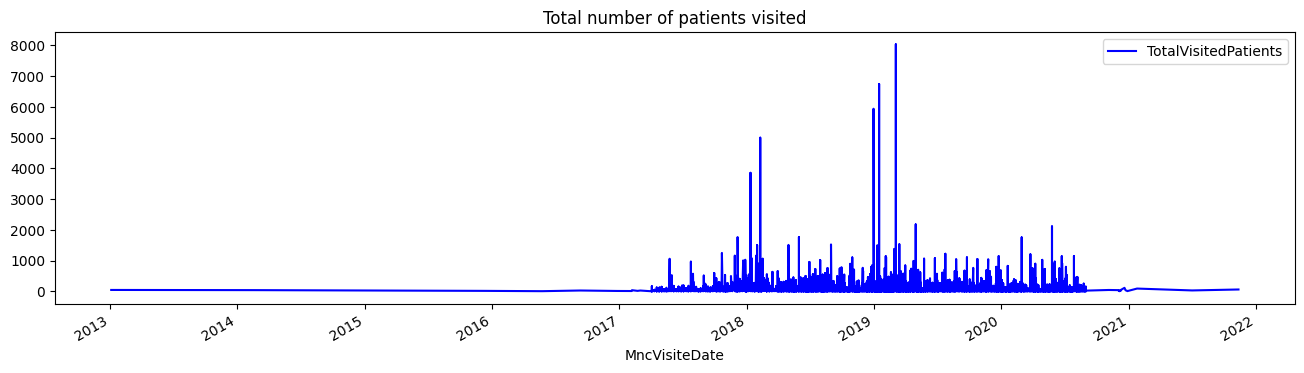

In [722]:
helpfuldata.plot(kind='line', y='TotalVisitedPatients',color='blue', figsize=(16, 4) )
plt.legend(loc='best')
plt.title('Total number of patients visited')
plt.show()

# CHOOSING DISTRICT

In [723]:
dist = helpfuldata[helpfuldata['DistrictId']==3]

In [724]:
dist.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139,3,298.0,2017-04-01
NaT,144,3,114.0,2017-04-01
NaT,238,3,113.0,2017-04-01
NaT,108,3,112.0,2017-04-01
NaT,154,3,115.0,2017-05-01


In [725]:
mnc_monthly = pd.DataFrame()

In [726]:
mnc_monthly = dist

In [727]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3338 entries, NaT to NaT
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  3338 non-null   int64         
 1   DistrictId            3338 non-null   int64         
 2   TalukaId              3338 non-null   float64       
 3   ReportingMonthyear    3338 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 130.4 KB


In [728]:
mnc_monthly.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139,3,298.0,2017-04-01
NaT,144,3,114.0,2017-04-01
NaT,238,3,113.0,2017-04-01
NaT,108,3,112.0,2017-04-01
NaT,154,3,115.0,2017-05-01


In [729]:
mnc_monthly.describe()

,TotalVisitedPatients,DistrictId,TalukaId
count,3338.000000,3338.0,3338.000000
mean,47.289694,3.0,131.040743
std,214.028838,0.0,83.369123
min,-8.000000,3.0,0.000000
25%,11.000000,3.0,113.000000
50%,29.000000,3.0,114.000000
75%,51.000000,3.0,114.000000
max,11860.000000,3.0,298.000000


# Outlier warning module
Percentile : The percent of population which lies below that value

Quantile : The cut points dividing the range of probability distribution into continuous intervals with equal probability. There are q-1 of q quantiles one of each k satisfying 0 < k < q

Quartile : Quartile is a special case of quantile, quartiles cut the data set into four equal parts i.e. q=4 for quantiles so we have First quartile Q1, second quartile Q2(Median) and third quartile Q3

Quartile First quartile The first quartile is determined by No of elements ×(1/4). It is the rank in the population (from least to greatest values) at which approximately 1/4 of the values are less than the value of the first quartile.

In [730]:
Q0 = mnc_monthly.TotalVisitedPatients.quantile(0)
Q1 = mnc_monthly.TotalVisitedPatients.quantile(0.25)
Q3 = mnc_monthly.TotalVisitedPatients.quantile(0.75)
IQR = Q3 - Q1

In [731]:
print(IQR)
print(Q0)
print(Q1)
print(Q3)

40.0
-8.0
11.0
51.0


In [732]:
min_value = Q0
print(min_value)

max_value = Q3 + 1.5 * IQR
print(max_value)

-8.0
111.0


In [733]:
value ={}

In [734]:
if value == 0:
 print('Entering a zero value, confirm if zero is ok')
elif not bool(value):
   # Check if this field is empty
   print('This field can not be empty, please enter a value')
elif (value < min_value):
   print ("The number of patients visited is less than the least number of patients visited in the past. Please confirm")
elif (value > max_value):
   print ("The number of patients is much higher than the number of patients visited in the past. Please confirm")

This field can not be empty, please enter a value


# ADJUSTING MNC_MONTHLY

In [735]:
mnc_monthly.drop(['DistrictId', 'DistrictId','ReportingMonthyear', 'TalukaId'],axis = 1, inplace = True)

In [736]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3338 entries, NaT to NaT
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TotalVisitedPatients  3338 non-null   int64
dtypes: int64(1)
memory usage: 52.2 KB


In [737]:
mnc_monthly

,TotalVisitedPatients
MncVisiteDate,
NaT,139
NaT,144
NaT,238
NaT,108
NaT,154
...,...
NaT,164
NaT,47
NaT,0


In [738]:
mnc_monthly['TotalVisitedPatients'].isnull().sum()

0

In [739]:
mnc_monthly.TotalVisitedPatients.isna().any()

False

In [740]:
check_for_nan = mnc_monthly['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
       ...  
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
Name: TotalVisitedPatients, Length: 3338, dtype: bool


In [741]:
mnc_monthly.index = dist.index

In [742]:
mnc_monthly.index

DatetimeIndex([       'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',
               ...
               '2020-08-14', '2020-08-25', '2020-08-29',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=3338, freq=None)

In [743]:
mnc_monthly.head()

,TotalVisitedPatients
MncVisiteDate,
NaT,139
NaT,144
NaT,238
NaT,108
NaT,154


In [744]:
mnc_monthly = mnc_monthly.resample('M').sum()

In [745]:
mnc_monthly.head(20)

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,163
2017-05-31,131
2017-06-30,179
2017-07-31,210
2017-08-31,322
2017-09-30,371
2017-10-31,313
2017-11-30,413
2017-12-31,379


In [746]:
mnc_monthly.describe()

,TotalVisitedPatients
count,41.000000
mean,562.243902
std,231.687805
min,131.000000
25%,379.000000
50%,642.000000
75%,710.000000
max,1278.000000


In [747]:
smallest10 = mnc_monthly.nsmallest(10, ['TotalVisitedPatients'])
smallest10

,TotalVisitedPatients
MncVisiteDate,
2017-05-31,131
2017-04-30,163
2017-06-30,179
2017-07-31,210
2020-04-30,290
2017-10-31,313
2020-05-31,319
2017-08-31,322
2020-06-30,353


In [748]:
largest10 = mnc_monthly.nlargest(10, ['TotalVisitedPatients'])
largest10

,TotalVisitedPatients
MncVisiteDate,
2018-06-30,1278
2019-04-30,821
2019-06-30,796
2019-11-30,790
2019-02-28,783
2018-08-31,765
2019-05-31,750
2019-10-31,746
2018-11-30,722


In [749]:
print(mnc_monthly)

               TotalVisitedPatients
MncVisiteDate                      
2017-04-30                      163
2017-05-31                      131
2017-06-30                      179
2017-07-31                      210
2017-08-31                      322
2017-09-30                      371
2017-10-31                      313
2017-11-30                      413
2017-12-31                      379
2018-01-31                      405
2018-02-28                      421
2018-03-31                      413
2018-04-30                      597
2018-05-31                      677
2018-06-30                     1278
2018-07-31                      642
2018-08-31                      765
2018-09-30                      622
2018-10-31                      683
2018-11-30                      722
2018-12-31                      706
2019-01-31                      573
2019-02-28                      783
2019-03-31                      657
2019-04-30                      821
2019-05-31                  

#PLOTTING GRAPHS OF TOTAL VISITED PATIENTS

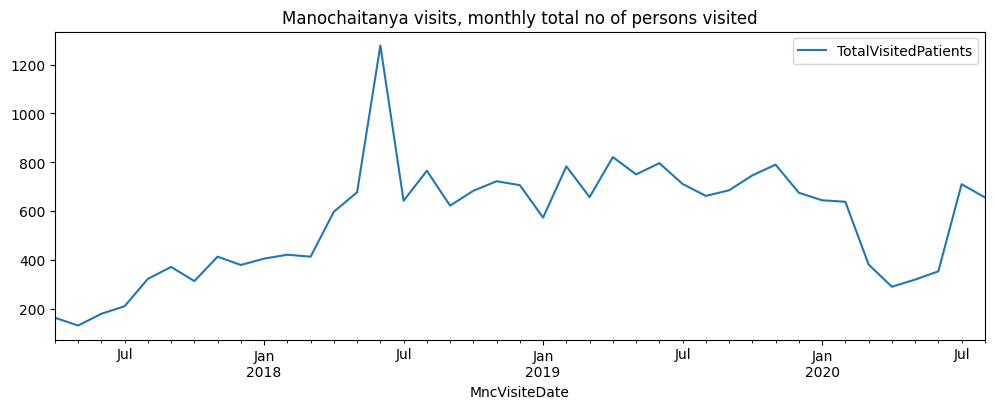

In [750]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya visits, monthly total no of persons visited')
plt.show()

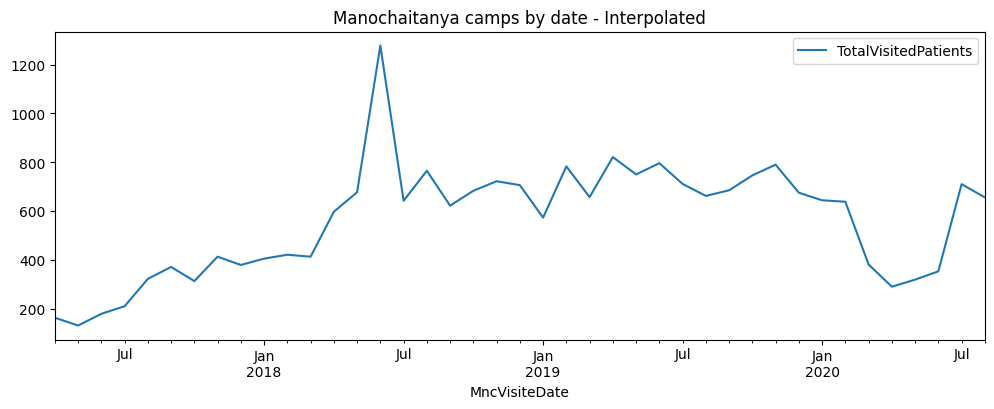

In [751]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Interpolated')
plt.show()

In [752]:
mnc_monthly['TotalVisitedPatients'].replace(to_replace=0, method='ffill', inplace = True)
# Impute the values with the previous value

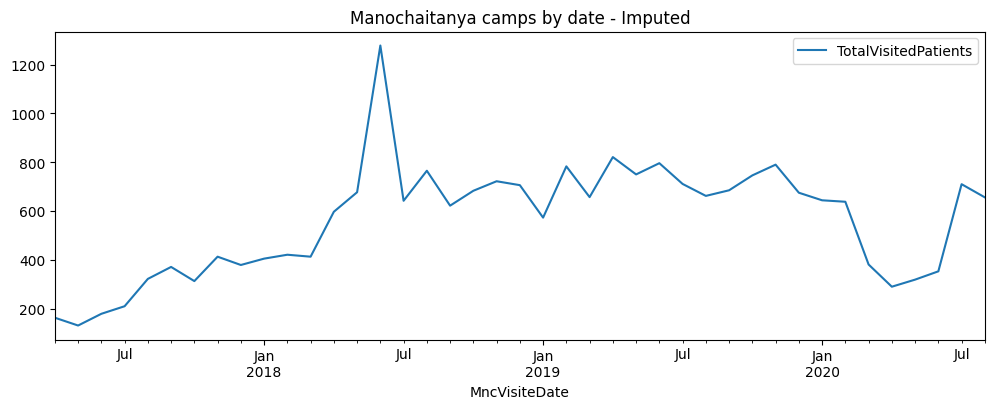

In [753]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Imputed')
plt.show()

#AUTO CORELATION AND PARTIAL AUTOCORELATION

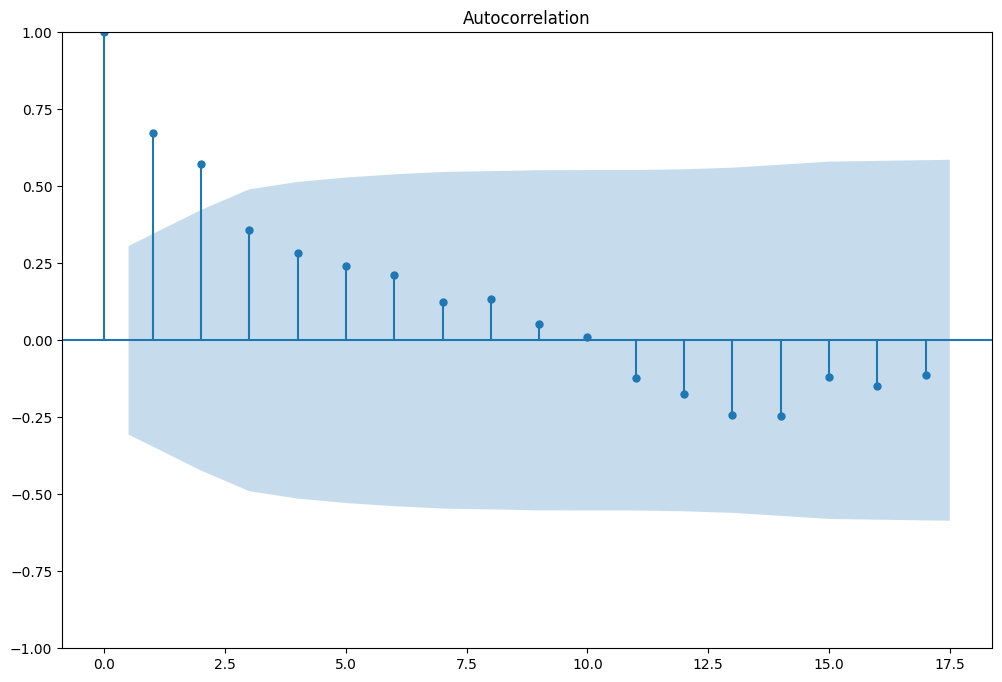

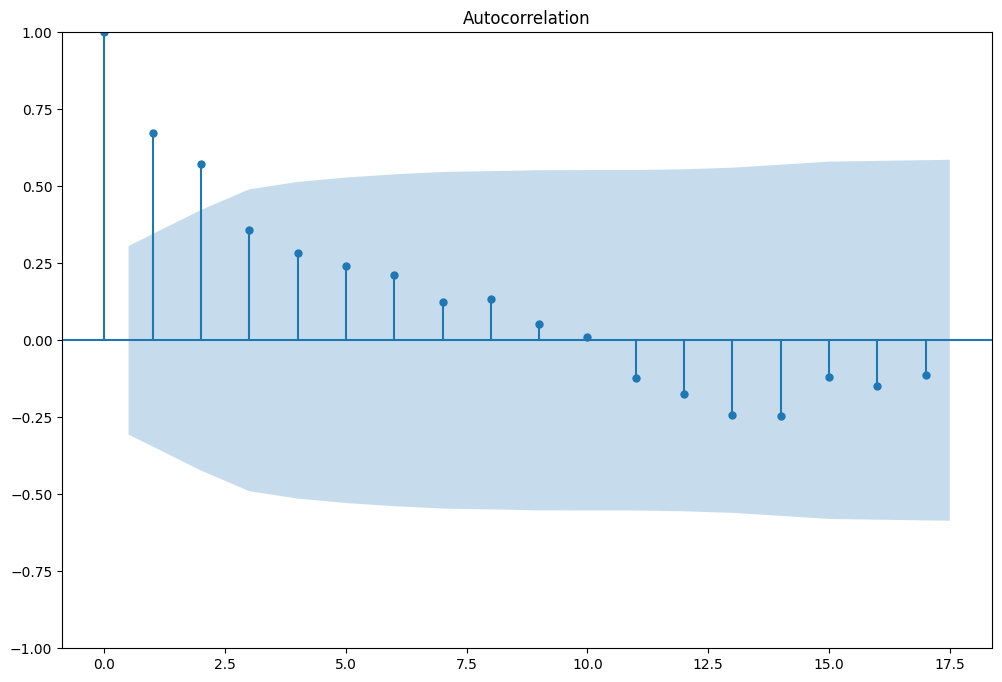

In [754]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mnc_monthly)

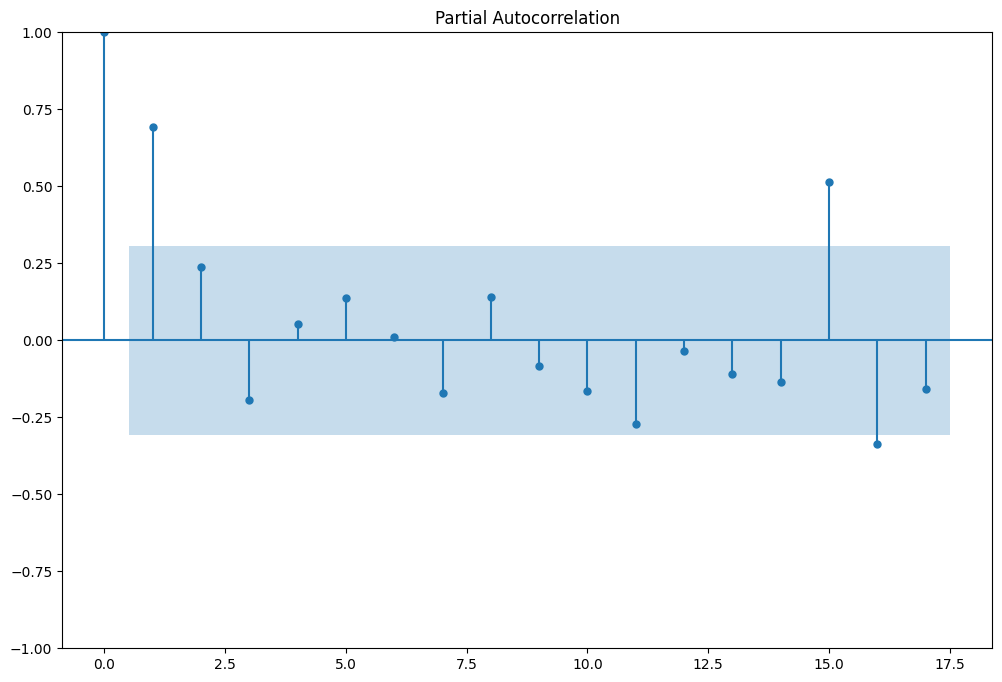

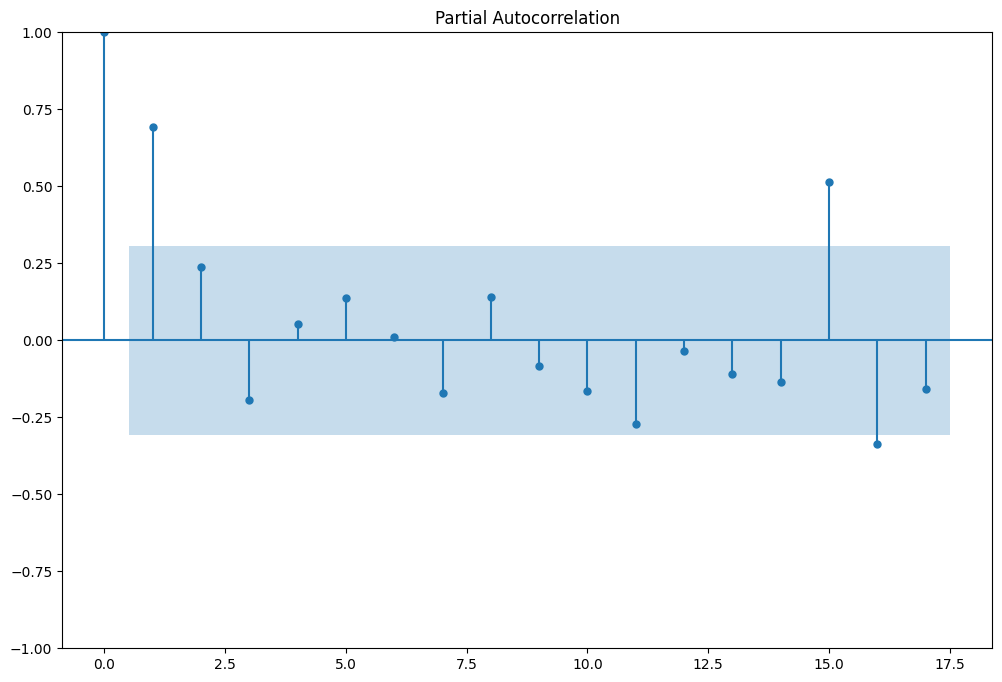

In [755]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(mnc_monthly)

#TIME SERIES GRAPH

In [756]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(mnc_monthly['TotalVisitedPatients'],model='additive', period=1)
sd

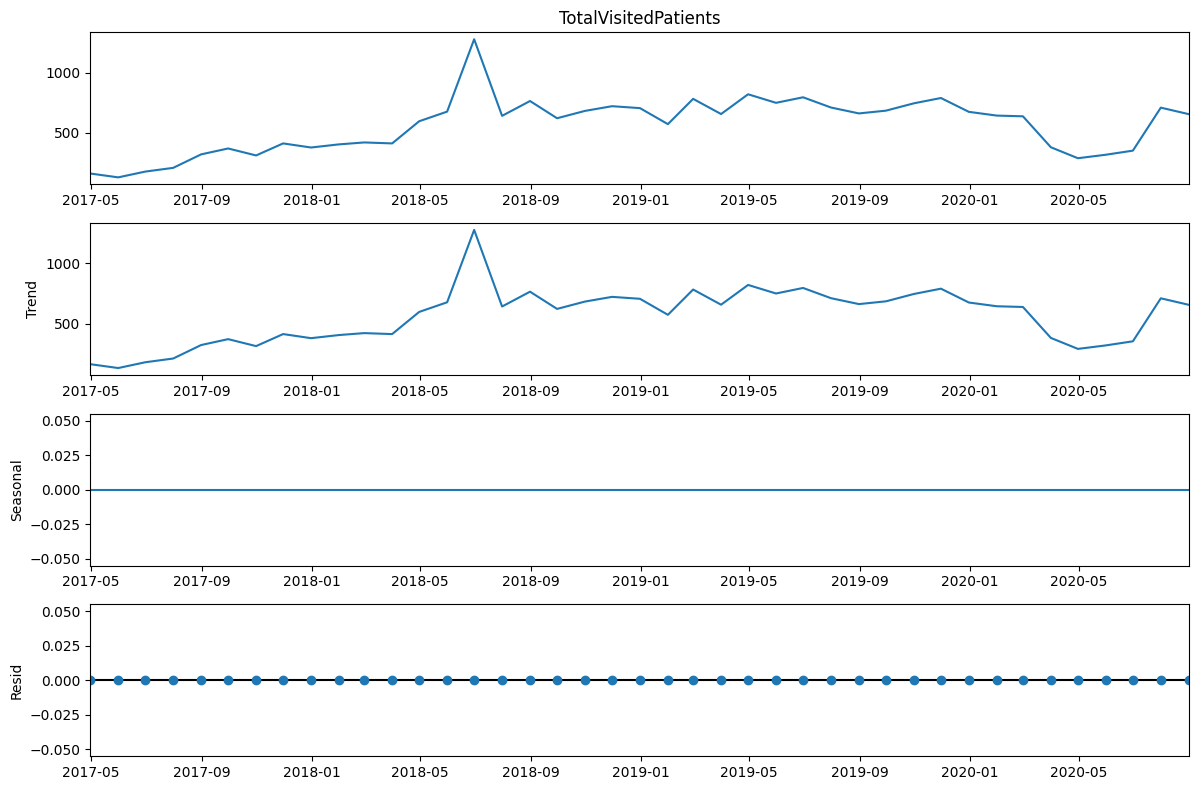

In [757]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose

fig = sd.plot()
plt.show()

####Time series of total patient visits to hospitals.
Decomposing the time series: It can be observed that there is a trend but there is no seasonality

#OUT OF SAMPLE FORECASTING (OOSF)

In [758]:
total_months = len(mnc_monthly['TotalVisitedPatients'])
train_len = len(mnc_monthly['TotalVisitedPatients']) - 6
train = mnc_monthly[0:train_len]

oosf_months=3
oosf_end_month = total_months + oosf_months
mnc_monthly_mean = mnc_monthly['TotalVisitedPatients'].mean()

train_test = mnc_monthly[0:total_months]
train_test_len = len(mnc_monthly[0:total_months])
from datetime import timedelta
for i in range(total_months,oosf_end_month):
    idx = mnc_monthly.tail(1).index[0] + pd.DateOffset(months=1)
    mnc_monthly.loc[idx] = mnc_monthly_mean
    
test= mnc_monthly[train_len :total_months]
oosf = mnc_monthly[total_months :oosf_end_month ]

# Populate the OOSF months with default values of forecast
# Choose the last six months as test

In [759]:
mnc_monthly_mean

562.2439024390244

In [760]:
total_months

41

In [761]:
train_test_len

41

In [762]:
train_test

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,163
2017-05-31,131
2017-06-30,179
2017-07-31,210
2017-08-31,322
2017-09-30,371
2017-10-31,313
2017-11-30,413
2017-12-31,379


In [763]:
len(oosf)

3

#MAPE CALCULATION METHODS
### Method Name
  #### a) Applying the Model
  #### b) Plotting the graph
  #### c) Calculation for MAPE (Mean absolute percentage error)
  #### d) Cumulative Results for MAPE

###1. NAVIE METHOD

#### a) Applying the Model

In [764]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['TotalVisitedPatients'][train_len-1]

In [765]:
y_hat_oos_naive= oosf.copy()
y_hat_oos_naive['oos_naive_forecast'] = train_test['TotalVisitedPatients'][total_months-1]

In [766]:
y_hat_oos_naive

,TotalVisitedPatients,oos_naive_forecast
MncVisiteDate,,
2020-09-30,562.243902,656
2020-10-30,562.243902,656
2020-11-30,562.243902,656


#### b) Plotting the graph

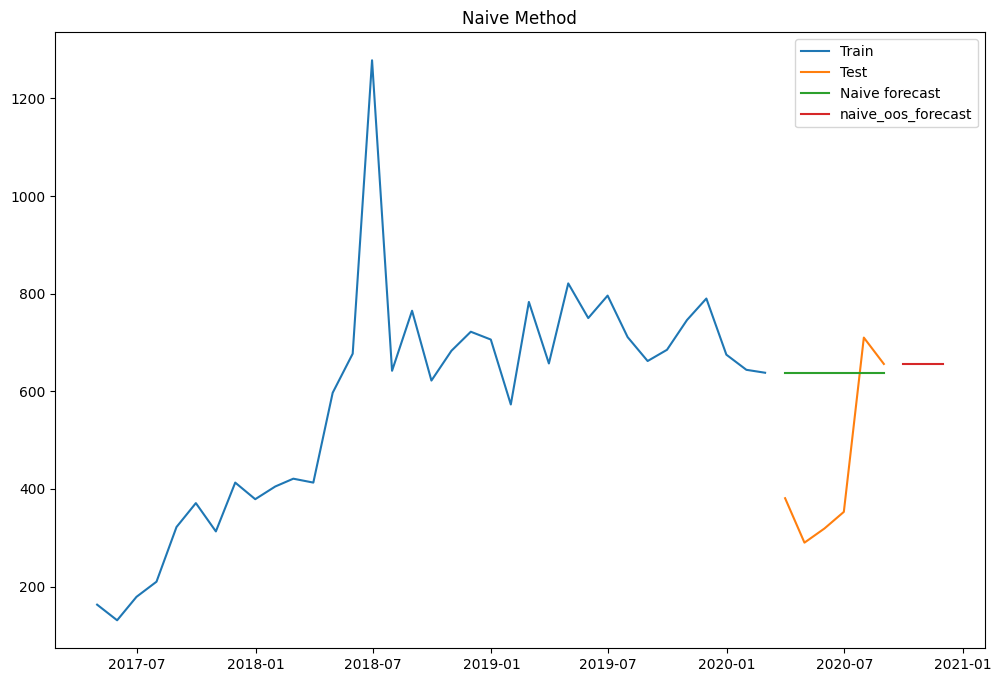

In [767]:
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.plot(y_hat_oos_naive['oos_naive_forecast'],label='naive_oos_forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [768]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_naive['naive_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [769]:
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape]})
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51


### 2. SIMPLE AVERAGE



####a) Applying the Model

In [770]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['TotalVisitedPatients'].mean()
y_hat_avg

,TotalVisitedPatients,avg_forecast
MncVisiteDate,,
2020-03-31,381.0,581.228571
2020-04-30,290.0,581.228571
2020-05-31,319.0,581.228571
2020-06-30,353.0,581.228571
2020-07-31,710.0,581.228571
2020-08-31,656.0,581.228571


In [771]:
y_hat_oos_avg= oosf.copy()
y_hat_oos_avg['oos_avg_forecast'] = train_test['TotalVisitedPatients'].mean()

In [772]:
y_hat_oos_avg

,TotalVisitedPatients,oos_avg_forecast
MncVisiteDate,,
2020-09-30,562.243902,562.243902
2020-10-30,562.243902,562.243902
2020-11-30,562.243902,562.243902


#### b) Plotting the graph

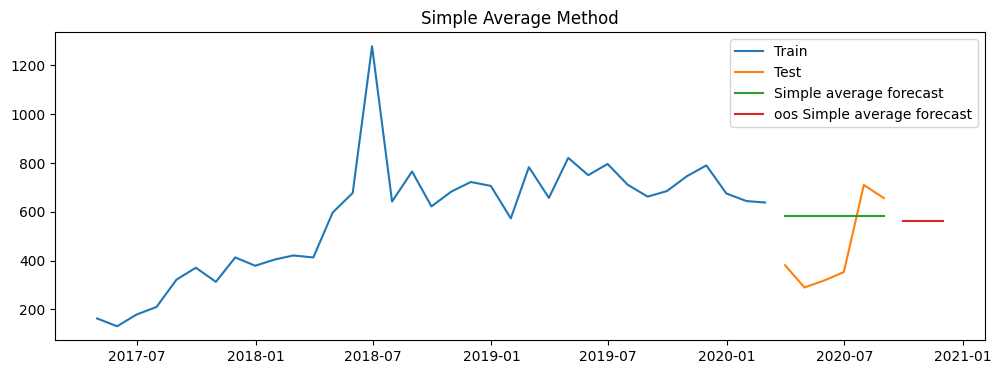

In [773]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.plot(y_hat_oos_avg['oos_avg_forecast'], label = 'oos Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [774]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_avg['avg_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [775]:
tempResults = pd.DataFrame({'Method':['Simple average method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89


### 3. SIMPLE MOVING AVERAGE

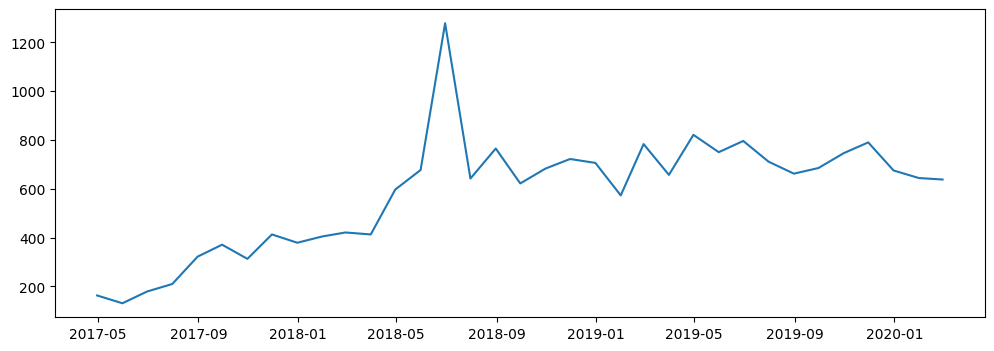

In [776]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='TotalVisitedPatients')

#### a) Applying the Model
  

In [777]:
y_hat_sma = mnc_monthly.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [778]:
y_hat_oos_sma = oosf.copy()
ma_window = 3
y_hat_oos_sma['oos_sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()

In [779]:
y_hat_oos_sma['oos_sma_forecast']

MncVisiteDate
2020-09-30    642.747967
2020-10-30    593.495935
2020-11-30    562.243902
Name: oos_sma_forecast, dtype: float64

#### b) Plotting the graph
  

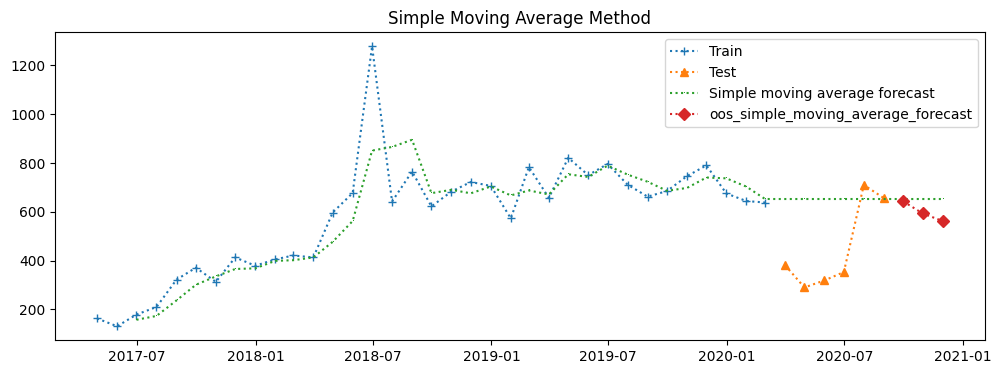

In [780]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train', marker ='+', linestyle = 'dotted')
plt.plot(test['TotalVisitedPatients'], label='Test', marker ='^', linestyle = 'dotted')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast', marker= ',', linestyle = 'dotted')
plt.plot(y_hat_oos_sma['oos_sma_forecast'],label='oos_simple_moving_average_forecast', marker = 'D', linestyle = 'dotted')
plt.plot(marker='o')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
 

In [781]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sma['sma_forecast'][train_len:])/test['TotalVisitedPatients'])*100,2)

 #### d) Cumulative Results for MAPE

In [782]:
tempResults = pd.DataFrame({'Method':['Simple moving average forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69


###4. SIMPLE EXPONENTIAL SMOOTHING TECHNIQUE
The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES)13. This method is suitable for forecasting data with no clear trend or seasonal pattern.

#### a) Applying the Model
  

In [783]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2
 
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))


In [784]:
len(test)
y_hat_ses['ses_forecast']

MncVisiteDate
2020-03-31    691.01661
2020-04-30    691.01661
2020-05-31    691.01661
2020-06-30    691.01661
2020-07-31    691.01661
2020-08-31    691.01661
Name: ses_forecast, dtype: float64

In [785]:
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 163.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [786]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_tt = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_tt_fit = model_tt.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2 

In [787]:
print(model_tt_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 163.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [788]:
y_hat_oos_ses = oosf.copy()
y_hat_oos_ses['oos_ses_forecast'] = model_tt_fit.predict((len(train_test) +1), (len(train_test) +oosf_months))

In [789]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2020-09-30,562.243902,NaN
2020-10-30,562.243902,NaN
2020-11-30,562.243902,691.01661


In [790]:
print (y_hat_oos_ses['oos_ses_forecast'])

MncVisiteDate
2020-09-30          NaN
2020-10-30          NaN
2020-11-30    691.01661
Name: oos_ses_forecast, dtype: float64


In [791]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2020-09-30,562.243902,NaN
2020-10-30,562.243902,NaN
2020-11-30,562.243902,691.01661


#### b) Plotting the graph
  

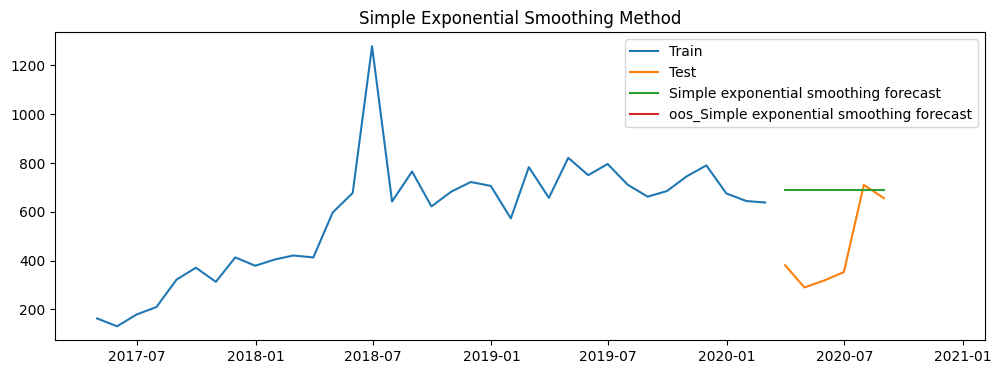

In [792]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.plot(y_hat_oos_ses['oos_ses_forecast'], label='oos_Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [793]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ses['ses_forecast'])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE 

In [794]:
tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34


### 5. HOLT METHOD

#### a) Applying the Model
  

In [795]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)

model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.4589031766068415, 'smoothing_trend': 0.0035713318853592404, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 148.82170084125704, 'initial_trend': 16.569817985158316, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [796]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

In [797]:
result = model_fit.forecast()
result

array([698.41812148])

In [798]:
y_hat_holt['holt_forecast']

MncVisiteDate
2020-03-31    698.418121
2020-04-30    714.762908
2020-05-31    731.107695
2020-06-30    747.452482
2020-07-31    763.797269
2020-08-31    780.142056
Name: holt_forecast, dtype: float64

In [799]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_test['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)

model_tt_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.4589031766068415, 'smoothing_trend': 0.0035713318853592404, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 148.82170084125704, 'initial_trend': 16.569817985158316, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [800]:
y_hat_oos_holt = oosf.copy()
y_hat_oos_holt['oos_holt_forecast'] = model_tt_fit.predict(len(train_test) +1, (len(train_test) +oosf_months))

In [801]:
print(len(train_test)+ (oosf_months))
print(oosf_months)

44
3


In [802]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2020-09-30    654.883521
2020-10-30    666.220767
2020-11-30    677.558012
Name: oos_holt_forecast, dtype: float64

In [803]:
ci = 100
upper_limit = y_hat_oos_holt['TotalVisitedPatients'] + ci
lower_imit  = y_hat_oos_holt['TotalVisitedPatients'] - ci

In [804]:
upper_limit

MncVisiteDate
2020-09-30    662.243902
2020-10-30    662.243902
2020-11-30    662.243902
Name: TotalVisitedPatients, dtype: float64

In [805]:
y_hat_oos_holt['upper_limit'] = y_hat_oos_holt['oos_holt_forecast'] + ci
y_hat_oos_holt['lower_imit'] = y_hat_oos_holt['oos_holt_forecast'] - ci

In [806]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2020-09-30    654.883521
2020-10-30    666.220767
2020-11-30    677.558012
Name: oos_holt_forecast, dtype: float64

In [807]:
y_hat_oos_holt['upper_limit']

MncVisiteDate
2020-09-30    754.883521
2020-10-30    766.220767
2020-11-30    777.558012
Name: upper_limit, dtype: float64

In [808]:
y_hat_oos_holt

,TotalVisitedPatients,oos_holt_forecast,upper_limit,lower_imit
MncVisiteDate,,,,
2020-09-30,562.243902,654.883521,754.883521,554.883521
2020-10-30,562.243902,666.220767,766.220767,566.220767
2020-11-30,562.243902,677.558012,777.558012,577.558012


#### b) Plotting the graph
  

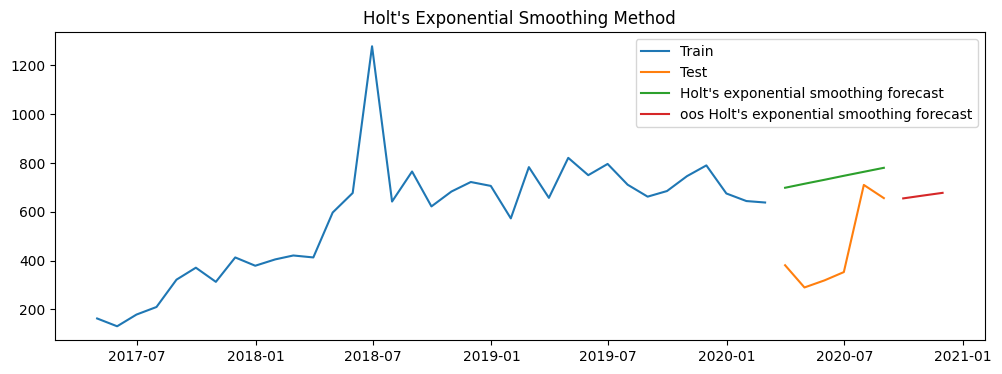

In [809]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(y_hat_oos_holt['oos_holt_forecast'], label='oos Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)



In [810]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_holt['holt_forecast'])/test['TotalVisitedPatients'])*100,2)

  #### d) Cumulative Results for MAPE

In [811]:
tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87


### 6. HOLT WINTERS ADDITIVE METHOD

#### a) Applying the Model

In [812]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)

{'smoothing_level': 0.6143757945976565, 'smoothing_trend': 0.03670785158419271, 'smoothing_seasonal': 0.10040452854066313, 'damping_trend': nan, 'initial_level': 90.61584582921962, 'initial_trend': 17.191763044516094, 'initial_seasons': array([  20.7015736 ,  -11.58525061,  218.84305944,  -55.63236105,
          6.74015275,  -29.76413863,  -19.7765871 ,   18.84814005,
        -57.76101496, -117.40383749,  -65.15147966, -136.65731391]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [813]:
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

#### b) Plotting the graph

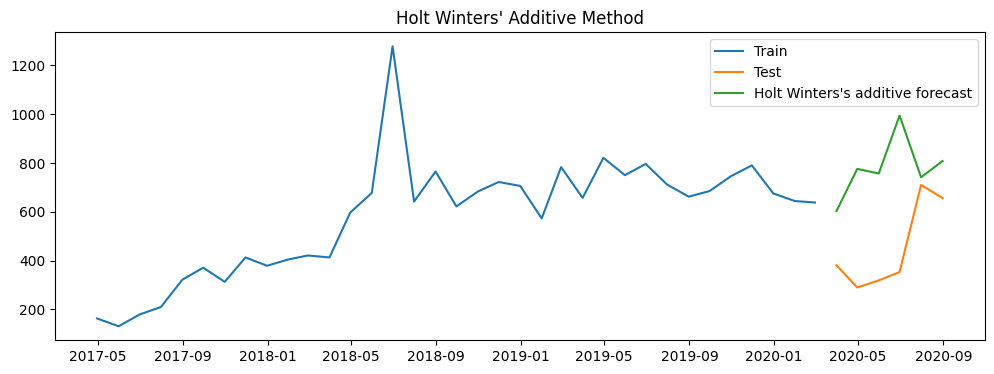

In [814]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [815]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwa['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [816]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36


### 7. HOLT WINTERS MULTIPLICATIVE METHOD

#### a) Applying the Model

In [817]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
print(model_fit.summary)

{'smoothing_level': 0.8058227261717703, 'smoothing_trend': 0.13033889836045512, 'smoothing_seasonal': 0.027476247552860152, 'damping_trend': nan, 'initial_level': 107.06316816477056, 'initial_trend': 27.378639763351995, 'initial_seasons': array([1.09696005, 1.05401301, 1.48006104, 0.90568535, 0.97513538,
       0.90142953, 0.95012222, 1.01395332, 0.92191481, 0.83826257,
       0.95538322, 0.85144465]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
<bound method HoltWintersResults.summary of <statsmodels.tsa.holtwinters.results.HoltWintersResults object at 0x7f7dce7d0820>>


In [818]:
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

#### b) Plotting the graph

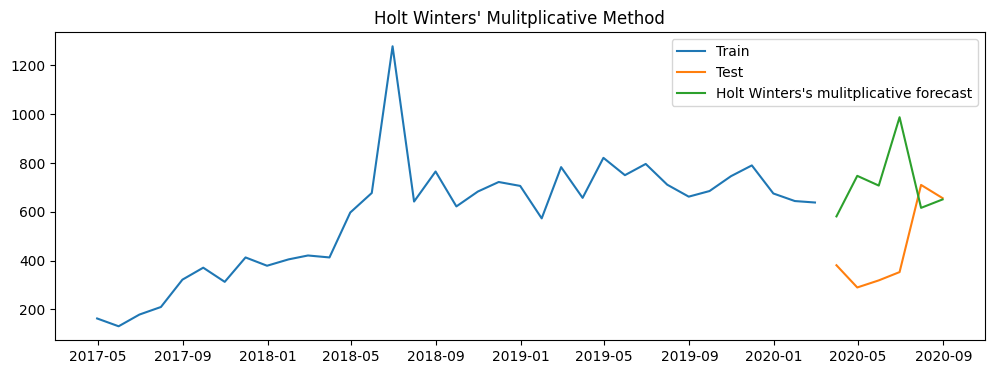

In [819]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [820]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwm['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [821]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62


### Regression Models

#### Stationary Test

In [822]:
# Stationarity test - KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(mnc_monthly['TotalVisitedPatients'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.340912
Critical Values @ 0.05: 0.46
p-value: 0.100000


#### Box Cox transformation to make variance constant

In [823]:
train.describe()

,TotalVisitedPatients
count,35.000000
mean,581.228571
std,236.021944
min,131.000000
25%,409.000000
50%,644.000000
75%,716.500000
max,1278.000000


In [824]:
test.describe()

,TotalVisitedPatients
count,6.000000
mean,451.500000
std,182.731223
min,290.000000
25%,327.500000
50%,367.000000
75%,587.250000
max,710.000000


In [825]:
oosf.describe()

,TotalVisitedPatients
count,3.000000
mean,562.243902
std,0.000000
min,562.243902
25%,562.243902
50%,562.243902
75%,562.243902
max,562.243902


In [826]:
mnc_monthly.describe()

,TotalVisitedPatients
count,44.000000
mean,562.243902
std,223.459562
min,131.000000
25%,380.500000
50%,630.000000
75%,707.000000
max,1278.000000


#### Graph After Box Cox transform

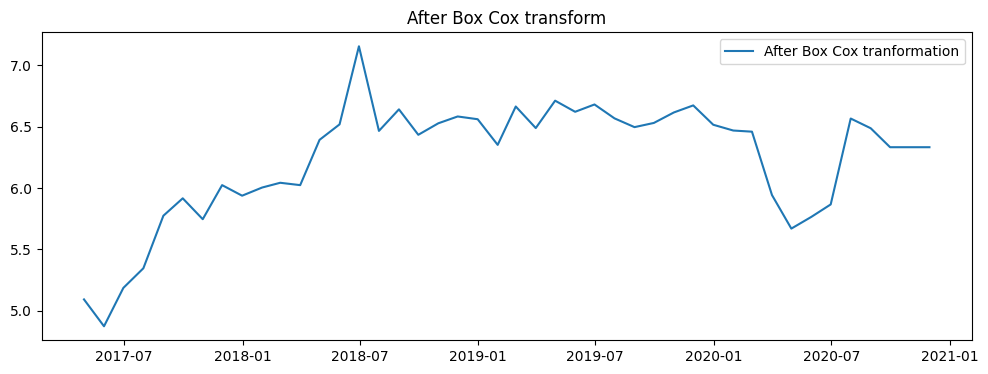

In [827]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(mnc_monthly['TotalVisitedPatients'], lmbda=0), index = mnc_monthly.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [828]:
data_boxcox

MncVisiteDate
2017-04-30    5.093750
2017-05-31    4.875197
2017-06-30    5.187386
2017-07-31    5.347108
2017-08-31    5.774552
2017-09-30    5.916202
2017-10-31    5.746203
2017-11-30    6.023448
2017-12-31    5.937536
2018-01-31    6.003887
2018-02-28    6.042633
2018-03-31    6.023448
2018-04-30    6.391917
2018-05-31    6.517671
2018-06-30    7.153052
2018-07-31    6.464588
2018-08-31    6.639876
2018-09-30    6.432940
2018-10-31    6.526495
2018-11-30    6.582025
2018-12-31    6.559615
2019-01-31    6.350886
2019-02-28    6.663133
2019-03-31    6.487684
2019-04-30    6.710523
2019-05-31    6.620073
2019-06-30    6.679599
2019-07-31    6.566672
2019-08-31    6.495266
2019-09-30    6.529419
2019-10-31    6.614726
2019-11-30    6.672033
2019-12-31    6.514713
2020-01-31    6.467699
2020-02-29    6.458338
2020-03-31    5.942799
2020-04-30    5.669881
2020-05-31    5.765191
2020-06-30    5.866468
2020-07-31    6.565265
2020-08-31    6.486161
2020-09-30    6.331936
2020-10-30    6.3319

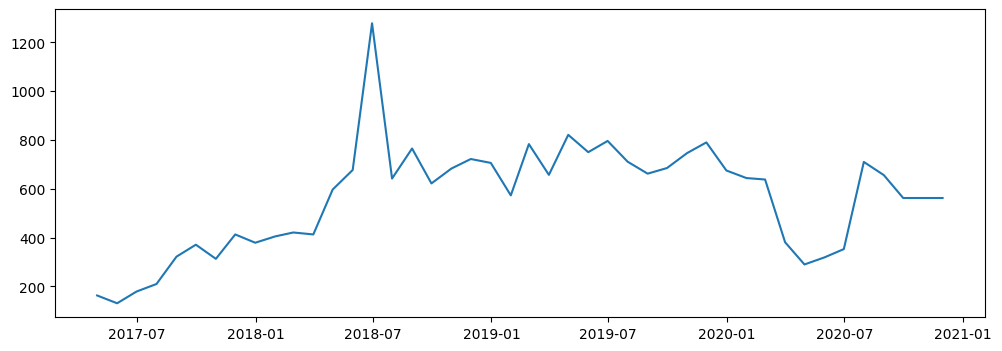

In [829]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'], label='TotalVisitedPatients')

#### Adjusting mnc_len

In [830]:
mnc_len = mnc_monthly['TotalVisitedPatients']

#### Install pmdarima

In [831]:
# !pip install pmdarima

Differencing to Remove Trend

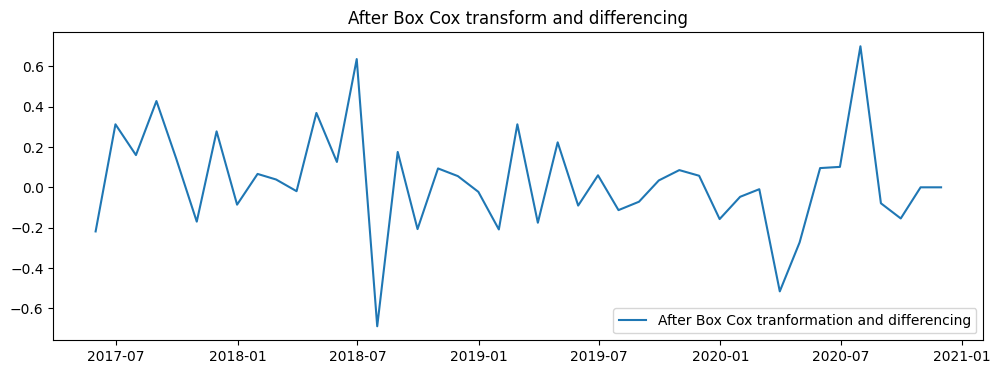

In [832]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), mnc_monthly.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [833]:
data_boxcox_diff.dropna(inplace=True)

In [834]:
train_data_boxcox = data_boxcox[:train_len] # Arima
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len] # Rest
test_data_boxcox_diff = data_boxcox_diff[train_len:]

# Differencing and boxcox done on the entire data, hence need to split it again

In [835]:
test_data_boxcox_diff

MncVisiteDate
2020-04-30   -0.272918
2020-05-31    0.095310
2020-06-30    0.101277
2020-07-31    0.698797
2020-08-31   -0.079104
2020-09-30   -0.154225
2020-10-30    0.000000
2020-11-30    0.000000
dtype: float64

### 8. AR

#### a) Applying the Model
  

In [836]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params) # gives the intercept and coefficient values

const     0.030439
ar.L1    -0.374276
sigma2    0.053629
dtype: float64


In [837]:
# In order to make the forecast, we need to transform the forecasts made to the original form
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
# In order to get back the original time series we do a cumulative sum to remove the differencing and exponentiate the 
# forecasts in order to remove the effect of the boxcox transformation

In [838]:
from datetime import timedelta
data_boxcox_diff.index.max()

Timestamp('2020-11-30 00:00:00')

#### b) Plotting the graph
  

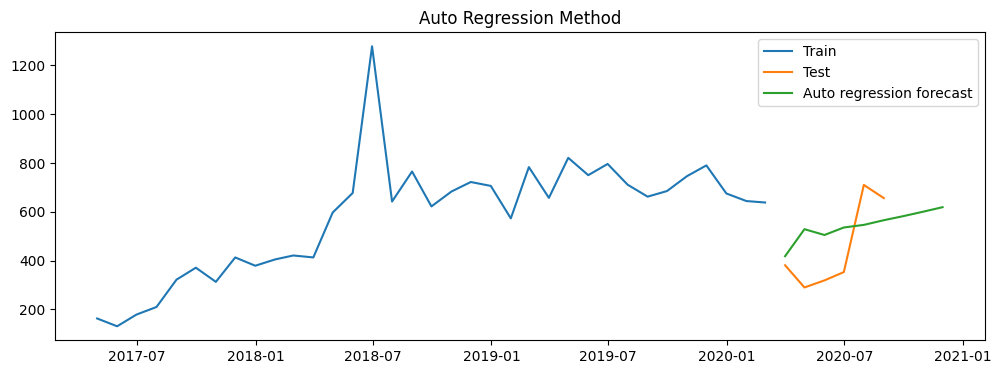

In [839]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [840]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [841]:
tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62
0,Autoregressive (AR) method,39.83


### 9. MA

#### a) Applying the Model
  

In [842]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()

print(model_fit.params)
# Default parameters are 0,0,1
# Based on ACF and PACF plots, trying P =2, D =1, Q = 2

const     0.029744
ma.L1    -0.266775
sigma2    0.056095
dtype: float64


In [843]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

#### b) Plotting the graph
  

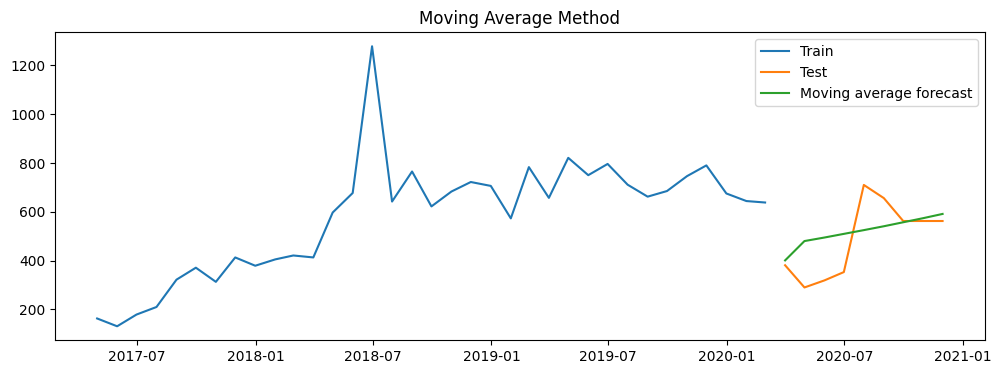

In [844]:
plt.figure(figsize=(12,4))
plt.plot(mnc_monthly['TotalVisitedPatients'][:train_len], label='Train')
plt.plot(mnc_monthly['TotalVisitedPatients'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [845]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ma['ma_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [846]:
tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62
0,Autoregressive (AR) method,39.83
0,Moving Average (MA) method,35.63


### 11. ARMA 

#### a) Applying the Model

In [847]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()

print(model_fit.params)

const     0.029047
ar.L1    -0.707855
ma.L1     0.384028
sigma2    0.051607
dtype: float64


In [848]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

#### b) Plotting the graph
  

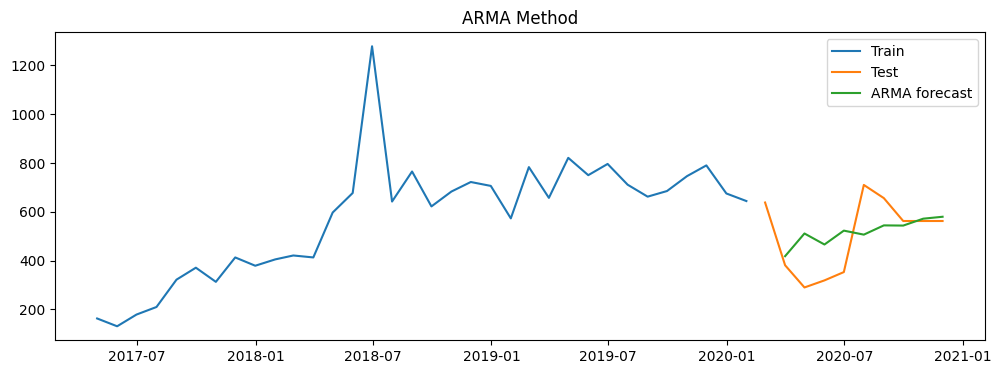

In [849]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'][:train_len-1], label='Train')
plt.plot(mnc_monthly['TotalVisitedPatients'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [850]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_arma['arma_forecast'][train_len-1:])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [851]:
tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62
0,Autoregressive (AR) method,39.83
0,Moving Average (MA) method,35.63
0,Autoregressive moving average (ARMA) method,37.65


### 12. ARIMA

#### a) Applying the Model

In [852]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.params)

ar.L1    -0.734835
ma.L1     0.436767
sigma2    0.046408
dtype: float64


In [853]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

#### b) Plotting the graph
  

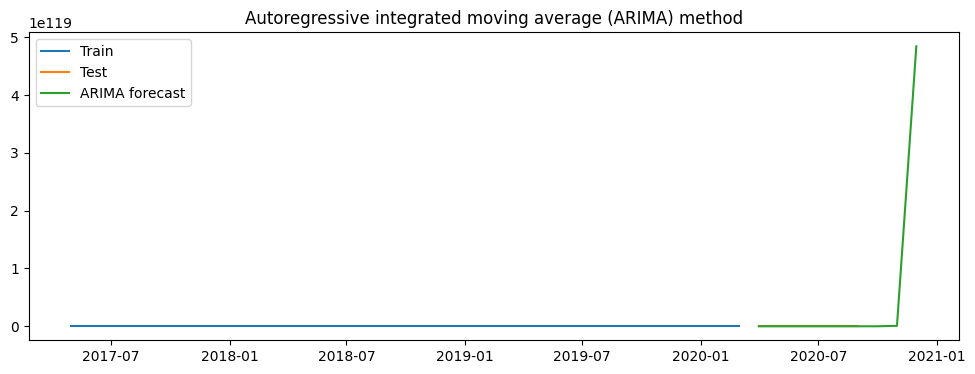

In [854]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [855]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [856]:
tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62
0,Autoregressive (AR) method,39.83
0,Moving Average (MA) method,35.63
0,Autoregressive moving average (ARMA) method,37.65


### 13. SARIMA 

#### a) Applying the Model

In [857]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()

print(model_fit.params)

ar.L1      -0.929380
ma.L1       0.995194
ar.S.L12   -0.751726
sigma2      0.044229
dtype: float64


In [858]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

#### b) Plotting the graph
  

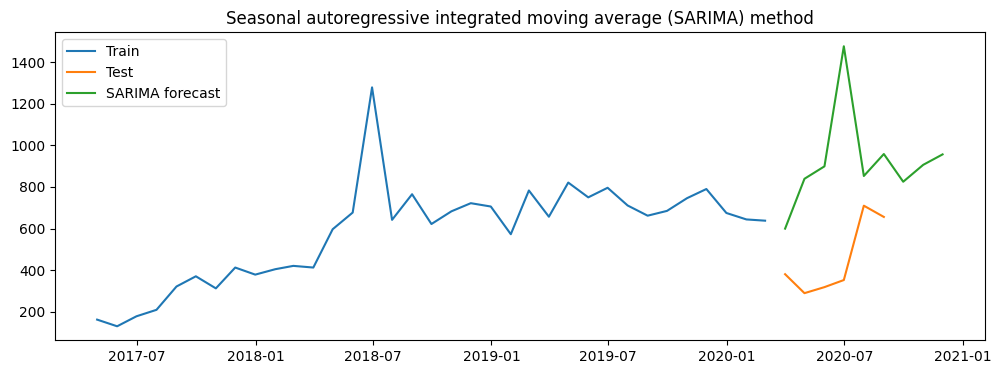

In [859]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [860]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [861]:
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62
0,Autoregressive (AR) method,39.83
0,Moving Average (MA) method,35.63
0,Autoregressive moving average (ARMA) method,37.65


# FINAL MAPE VALUES

In [862]:
results

,Method,MAPE
0,Naive method,63.51
0,Simple average method,54.89
0,Simple moving average forecast,65.69
0,Simple exponential smoothing forecast,73.34
0,Holt's exponential smoothing method,82.87
0,Holt Winters' additive method,95.36
0,Holt Winters' multiplicative method,87.62
0,Autoregressive (AR) method,39.83
0,Moving Average (MA) method,35.63
0,Autoregressive moving average (ARMA) method,37.65
